# Boston Housing Price Prediction 
## (Polinomial Regression)

## 1 Introduction 

In this document we will try to analyze if the polinomial regression is a good method to predict the price housing in the Boston market, using the Boston housing data from sklearn datasets. The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. 

Regarding the prediction, we will use the scikit-learn library, where we will substract the PolynomialFeatures class to compute the polinomial attributes. Then, we will use the LinearRegression to calculate the linear regression with the polinomial data.

## 2 Import the necessary libraries 

In [3]:
import numpy as np  # multi-dimensional arrays manipulating
import pandas as pd  # data management and data analysis
import sklearn # machine learning library
import matplotlib.pylab as plt  # data visualization
import seaborn as sns # data visualization

## 3 Explore the data

In [4]:
from sklearn import datasets

boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.

X_boston,y_boston = boston.data, boston.target # Create "X" matrix and "y" vector from the dataset.

# X_boston = store the data
# y_boston = store the classes/targets

print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


Let's see the content of the dataset, which are the "keys or features" of the attributes and the general description:

In [5]:
print('keys: {}'.format(boston.keys()))
print('feature names: {}'.format(boston.feature_names))
print(boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

## 4 Data Visualization 

Let's predict median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population"

### 4.1 Histograms 

Text(0, 0.5, 'count')

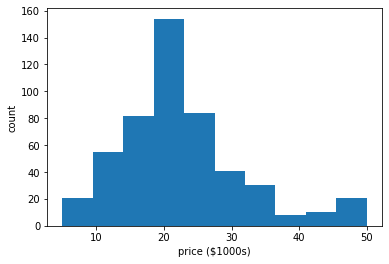

In [8]:
# Histogram of prices
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### 4.2 Scatter Plots

Let's build again the plot of house price and LSTAT, including higher order terms:

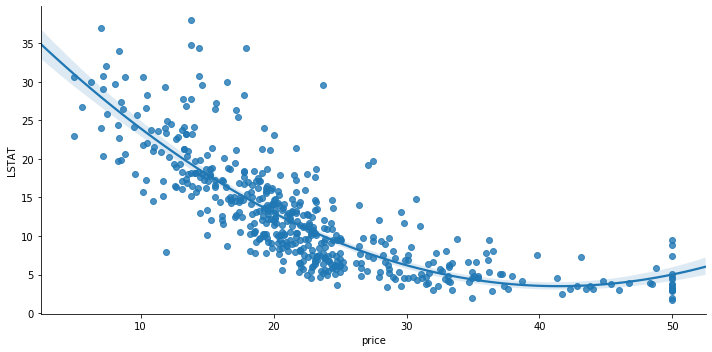

In [15]:
# Estimate a polynomial regression of order 2
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) # Create a DataFrame from the Boston dataset
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT", df_boston, order=2, aspect=2);

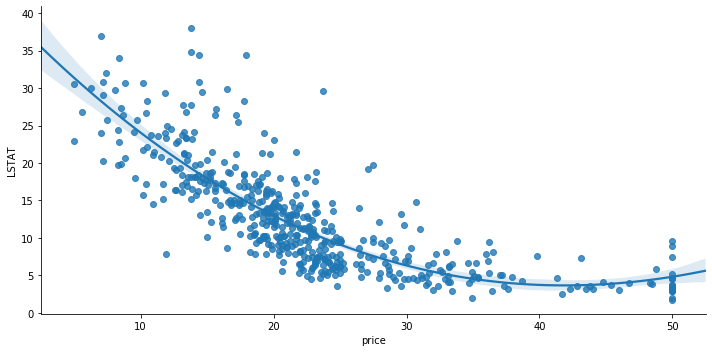

In [16]:
# Estimate a polynomial regression of order 3
sns.lmplot("price", "LSTAT", df_boston, order=3, aspect=2)

Comments: It looks like the LSTAT and the price has a polinomial relation. Therefore, we will try to analyze if the polinomial regression is a good method to predict the price housing in the Boston market.

## 5 Prediction and Evaluation 

Let's make predictions using the Scikit-learn library, building a polynomial regression model.

Before starting, we need to split the data into training set and testing set.

In [6]:
# "Training set" to train the system
# "Test set" to evaluate the learned or trained system
train_size = int(X_boston.shape[0]/2)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))

Train and test sizes (253, 13) (253, 13)


Firstly, let's build the linear regression model, upon which the polynomial regression model will be based.

In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Create the Linear Regression estimator
reg.fit ([[0, 1], [1, 1], [2, 1]], [0, 1, 2])  # Perform the fitting
reg.coef_  # Store the status of the estimator

array([1., 0.])

In [8]:
regr_boston = LinearRegression()  # Create the Linear Regression estimator
regr_boston.fit(X_train, y_train) # Perform the fitting
print('"Coeff" and "intercept": {} {}'.format(regr_boston.coef_, regr_boston.intercept_))

"Coeff" and "intercept": [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582944993


In [9]:
#Compute Score ( 𝑅2 ) for training and testing sets
print('Training Score: {}'.format(regr_boston.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_boston.score(X_test, y_test)))

#Compute MSE (Mean Squared Error) for training and testing sets
print('Training MSE: {}'.format(np.mean((regr_boston.predict(X_train) - y_train)**2)))
print('Testing MSE: {}'.format(np.mean((regr_boston.predict(X_test) - y_test)**2)))

Training Score: 0.8557827200735684
Testing Score: -2.2527343423925448
Training MSE: 9.987517325463743
Testing MSE: 303.4368629265912


Secondly, let's build the polynomial regression model.

In [10]:
# Evaluation of the polynomial model
from sklearn.preprocessing import PolynomialFeatures #calculate polinomial features
from sklearn.pipeline import Pipeline #

# Create the Polynomial Regression estimator
regr_pol = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
#Perform the fit
regr_pol.fit(X_boston, y_boston) 

#print('Coeff and intercept: {} {}'.format(regr_pol.named_steps['linear'].coef_, regr_pol.named_steps['linear'].intercept_))
print('Multiple Polynomial regression Score: {}'.format(regr_pol.score(X_boston, y_boston)))
print('Multiple Polynomial regression MSE: {}'.format(np.mean((regr_pol.predict(X_boston) - y_boston)**2)))

Multiple Polynomial regression Score: 0.9289961714593019
Multiple Polynomial regression MSE: 5.99411169079421


Let's create a dataframe to extract one of the features (LSTAT). Then, we will use the sames methods used before to calculate the Score and SME for Polynomial regression of order 2 and order 3.

In [12]:
#Quantitative evaluation of the SIMPLE lineal and polynomial regression
BostonDF = pd.DataFrame(boston.data)
BostonDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
BostonDF.columns = boston.feature_names
BostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
#Select the variable to analyze from the boston dataframe
x=BostonDF['LSTAT']
y=boston.target
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

Make the prediction with linear regression:

In [18]:
regr_boston = LinearRegression() # Create the Linear Regression estimator
regr_boston.fit(x, y) #Perform the fitting 

print('Simple linear regression Score: {}'.format(regr_boston.score(x, y)))
print('Simple linear regression MSE: {}'.format(np.mean((regr_boston.predict(x) - y)**2)))

Simple linear regression Score: 0.5441462975864799
Simple linear regression MSE: 38.48296722989414


Make the prediction with polinomial regression through data from linear regression:

In [19]:
#Polinomial regression of order 2
regr_pol = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))]) 
regr_pol.fit(x, y) 

print('Simple Polynomial regression (order 2) Score: {}'.format(regr_pol.score(x, y)))
print('Simple Polynomial regression (order 2) MSE: {}'.format(np.mean((regr_pol.predict(x) - y)**2)))

#Polinomial regression of order 3
regr_pol = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
regr_pol.fit(x, y) 

print('Simple Polynomial regression (order 3) Score: {}'.format(regr_pol.score(x, y)))
print('Simple Polynomial regression (order 3) MSE: {}'.format(np.mean((regr_pol.predict(x) - y)**2)))

Simple Polynomial regression (order 2) Score: 0.6407168971636611
Simple Polynomial regression (order 2) MSE: 30.330520075853716
Simple Polynomial regression (order 3) Score: 0.6578476405895719
Simple Polynomial regression (order 3) MSE: 28.884350319213173


Comments: comparing both predictions, we realized that the polinomial regression is a good method to predict the housing price keeping in mind the the LSTAT, because the Score resulst are closer to 1 (0.6407168971636611 / 0.6578476405895719) compared to linear regression (0.5441462975864799). 

In addition, the MSE resulst are better of the polinomial regression (30.330520075853716 / 28.884350319213173) because are lower than the linear regression results (38.48296722989414).